In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics   
import matplotlib.style
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay



In [2]:
df= pd.read_excel('Election_Data (1).xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape

(1525, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
df.duplicated().sum()

8

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [15]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [16]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [17]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [18]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


<Axes: xlabel='age', ylabel='Count'>

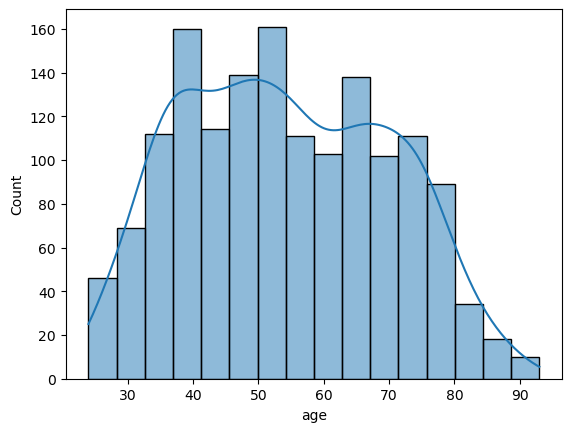

In [19]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='age'>

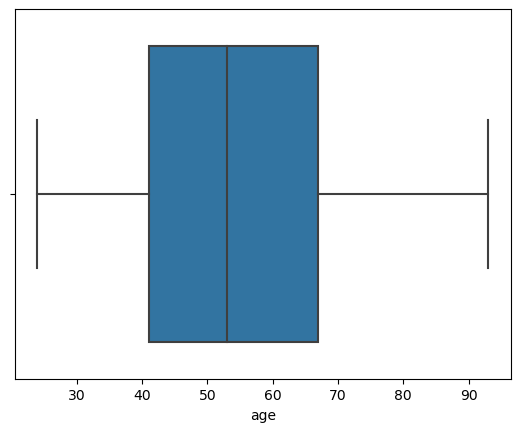

In [20]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='gender'>

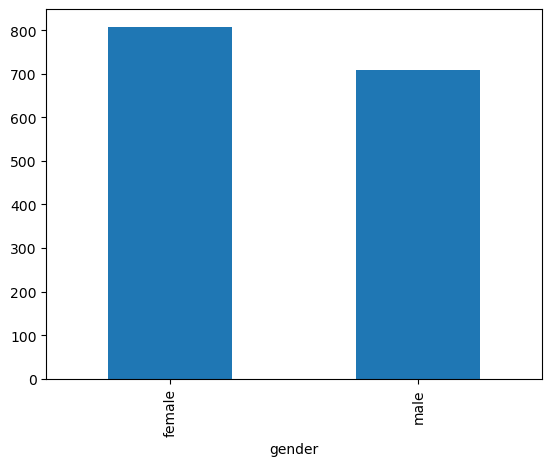

In [21]:
df['gender'].value_counts().plot.bar()

<Axes: xlabel='vote'>

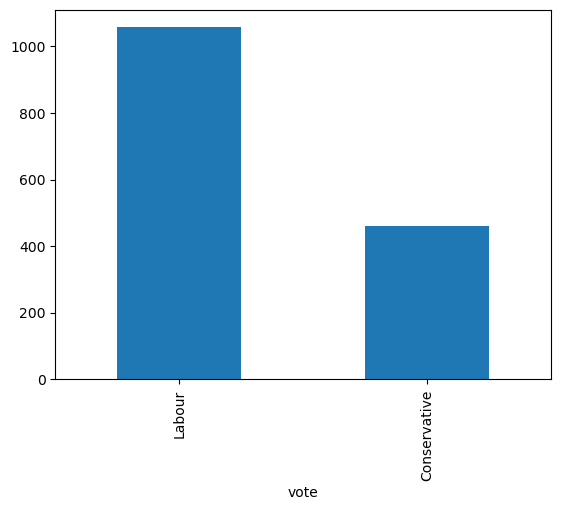

In [22]:
df['vote'].value_counts().plot.bar()

<Axes: xlabel='political.knowledge'>

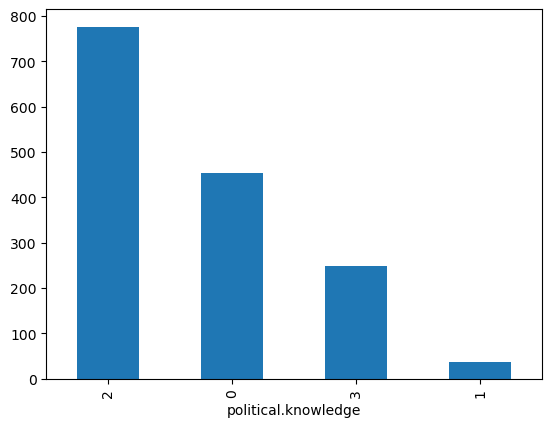

In [23]:
df['political.knowledge'].value_counts().plot.bar()

In [24]:
df['political.knowledge'].value_counts(normalize=True)

political.knowledge
2    0.511536
0    0.299275
3    0.164140
1    0.025049
Name: proportion, dtype: float64

<Axes: xlabel='economic.cond.national'>

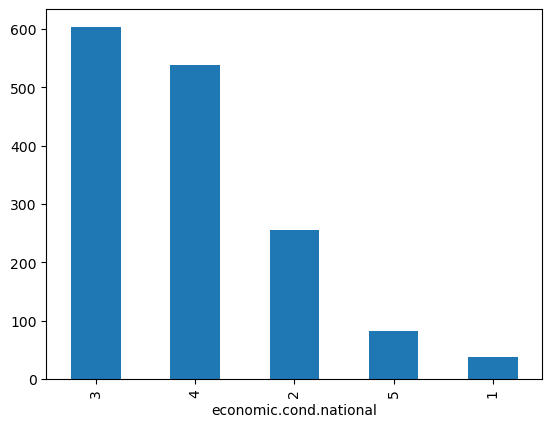

In [25]:
df['economic.cond.national'].value_counts().plot.bar()

In [26]:
df['economic.cond.national'].value_counts(normalize=True)

economic.cond.national
3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: proportion, dtype: float64

<Axes: xlabel='Blair'>

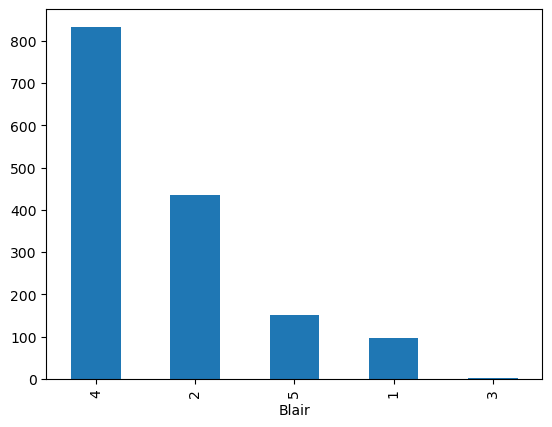

In [27]:
df['Blair'].value_counts().plot.bar()

<Axes: xlabel='Hague'>

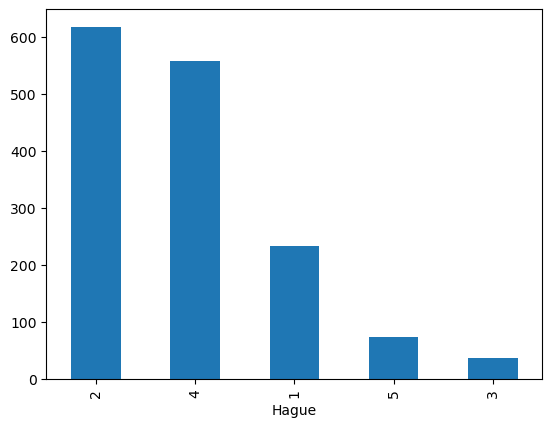

In [28]:
df['Hague'].value_counts().plot.bar()

<Axes: xlabel='Europe'>

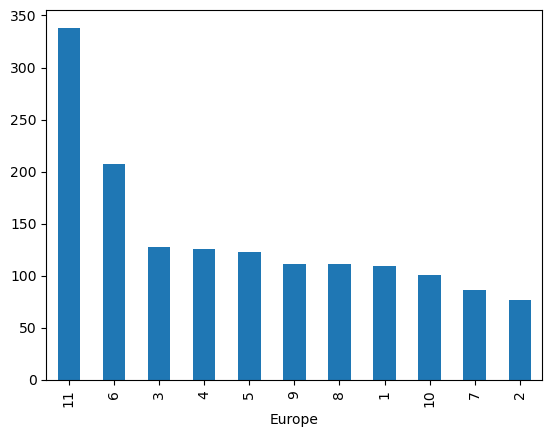

In [29]:
df['Europe'].value_counts().plot.bar()

In [30]:
def univariateAnalysis_numeric_basic(column,nbins):   
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Distribution of age
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


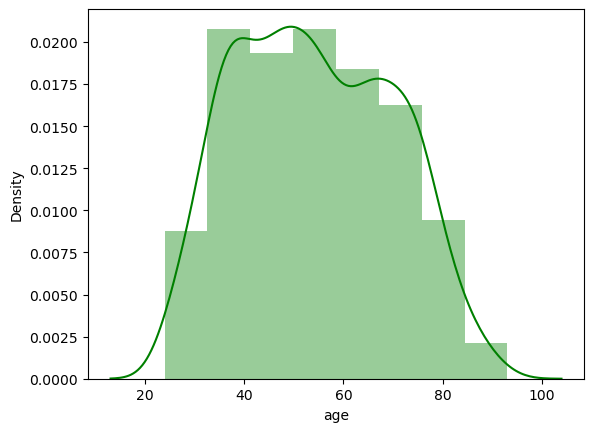

BoxPlot of age
----------------------------------------------------------------------------


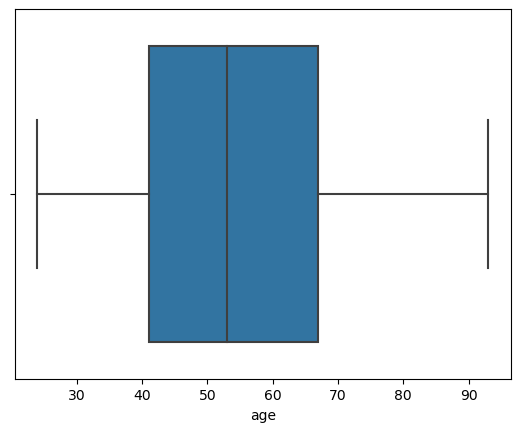

Distribution of political.knowledge
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


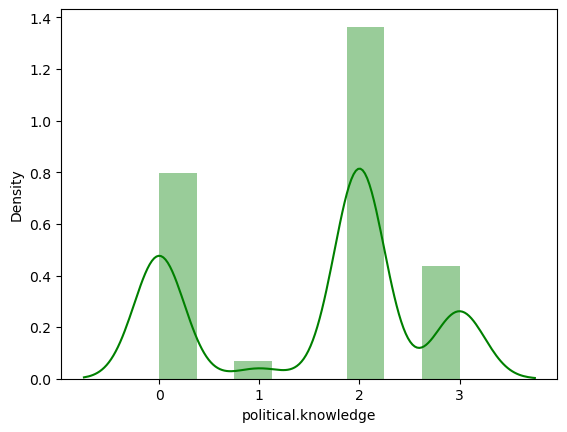

BoxPlot of political.knowledge
----------------------------------------------------------------------------


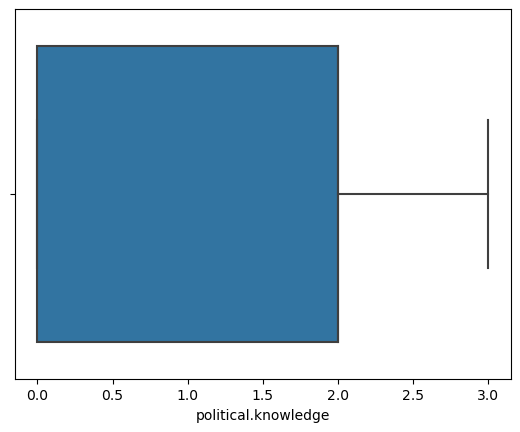

Distribution of economic.cond.national
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


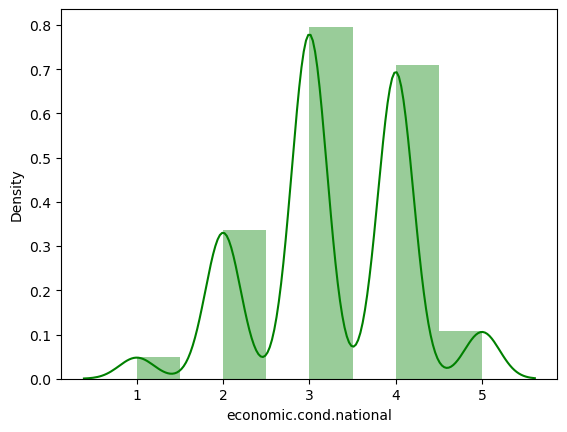

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


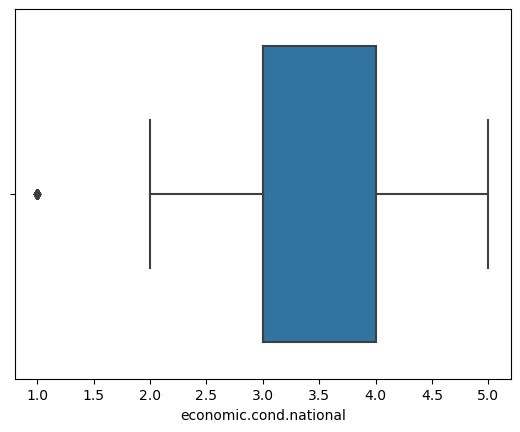

Distribution of economic.cond.household
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


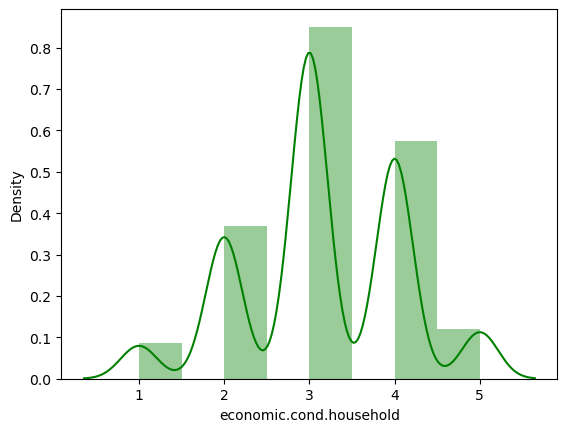

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


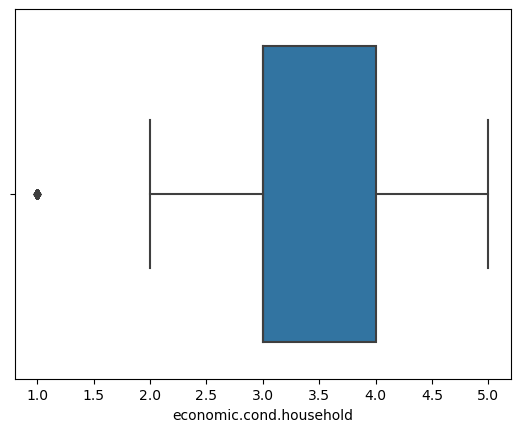

Distribution of Blair
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


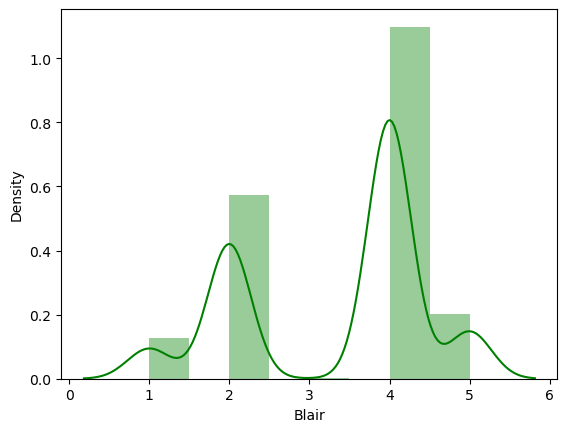

BoxPlot of Blair
----------------------------------------------------------------------------


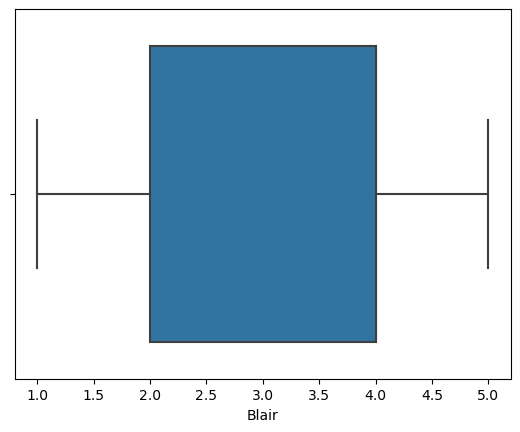

Distribution of Hague
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


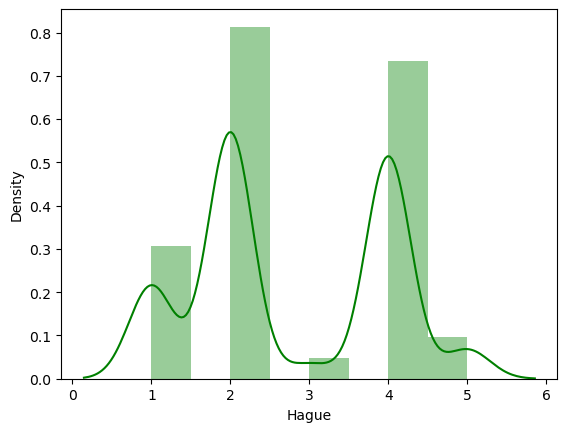

BoxPlot of Hague
----------------------------------------------------------------------------


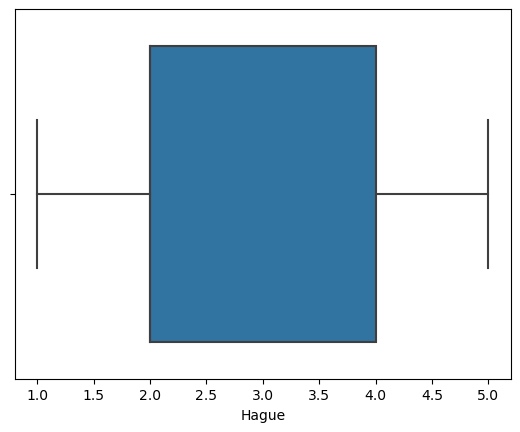

Distribution of Europe
----------------------------------------------------------------------------


C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_13796\2809944802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, color='g',bins=nbins);


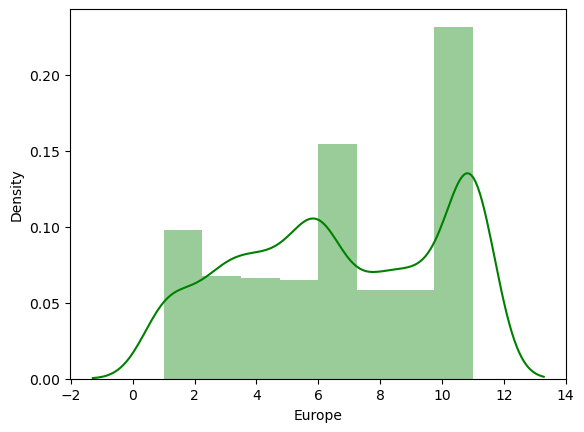

BoxPlot of Europe
----------------------------------------------------------------------------


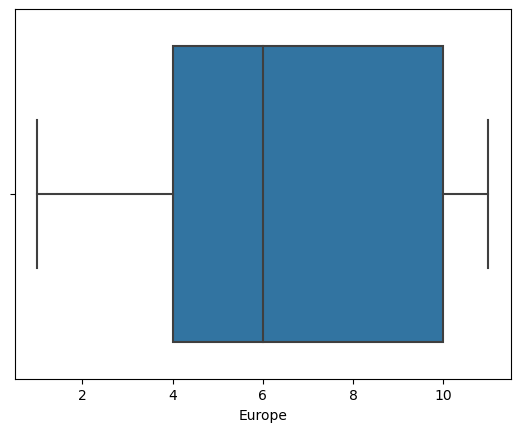

In [31]:
univariateAnalysis_numeric_basic('age',8)
univariateAnalysis_numeric_basic('political.knowledge',8)
univariateAnalysis_numeric_basic('economic.cond.national',8)
univariateAnalysis_numeric_basic('economic.cond.household',8)
univariateAnalysis_numeric_basic('Blair',8)
univariateAnalysis_numeric_basic('Hague',8)
univariateAnalysis_numeric_basic('Europe',8)

<Axes: xlabel='economic.cond.national', ylabel='count'>

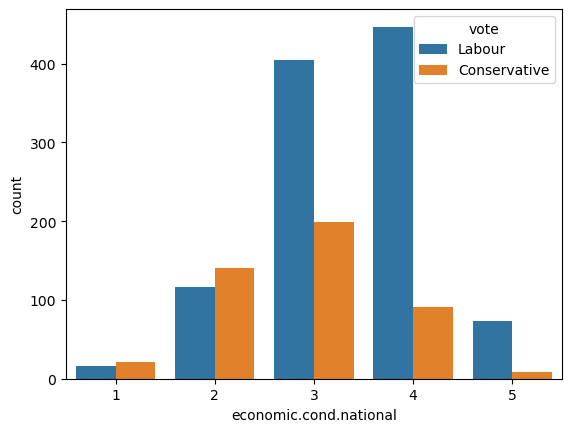

In [32]:
sns.countplot(x='economic.cond.national',hue='vote',data=df)

<Axes: xlabel='economic.cond.household', ylabel='count'>

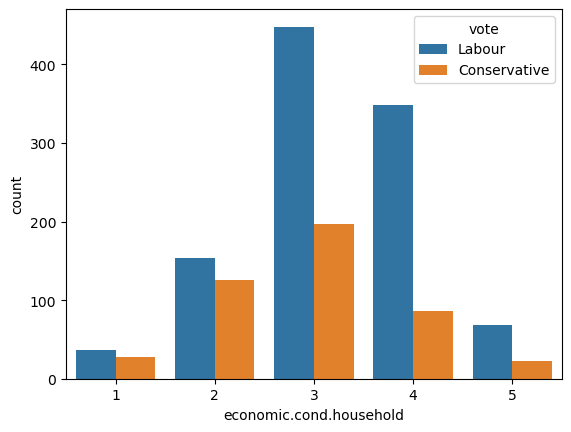

In [33]:
sns.countplot(x='economic.cond.household',hue='vote',data=df)

<Axes: xlabel='gender', ylabel='count'>

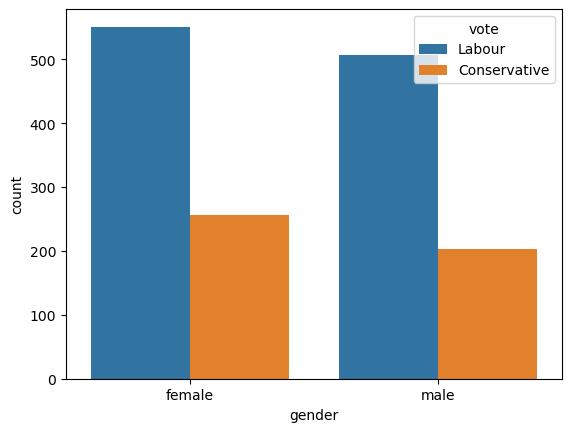

In [34]:
sns.countplot(x='gender',hue='vote',data=df)

<Axes: xlabel='Europe', ylabel='count'>

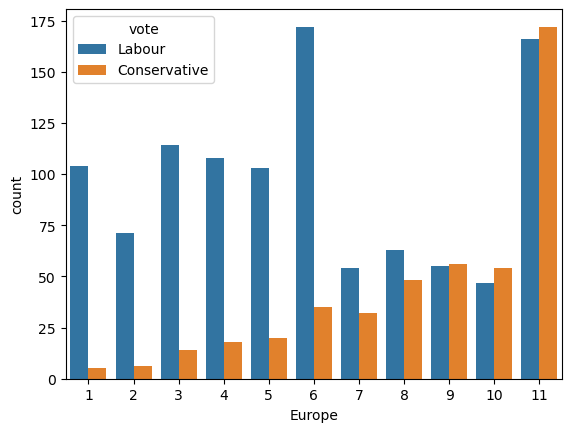

In [35]:
sns.countplot(x='Europe',hue='vote',data=df)

<Axes: xlabel='Hague', ylabel='count'>

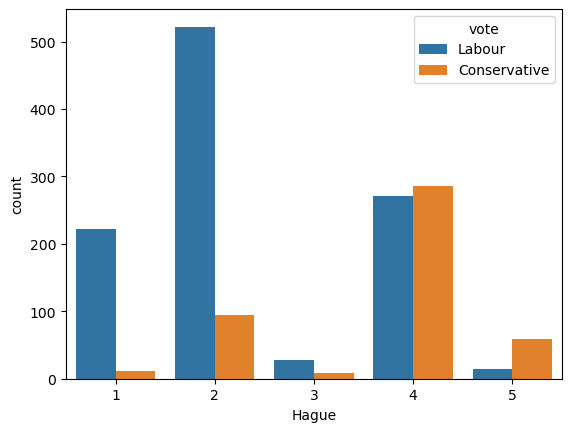

In [36]:
sns.countplot(x='Hague',hue='vote',data=df)

<Axes: xlabel='Blair', ylabel='count'>

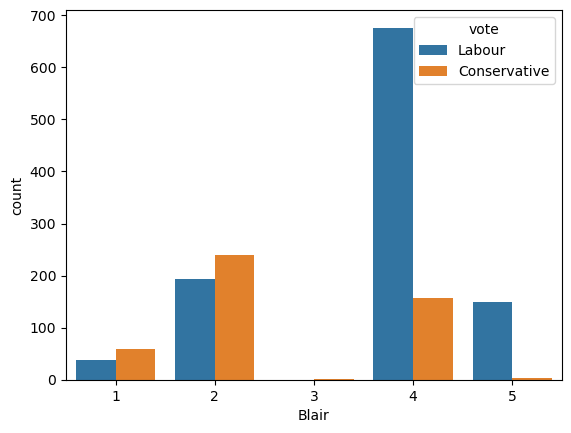

In [37]:
sns.countplot(x='Blair',hue='vote',data=df)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


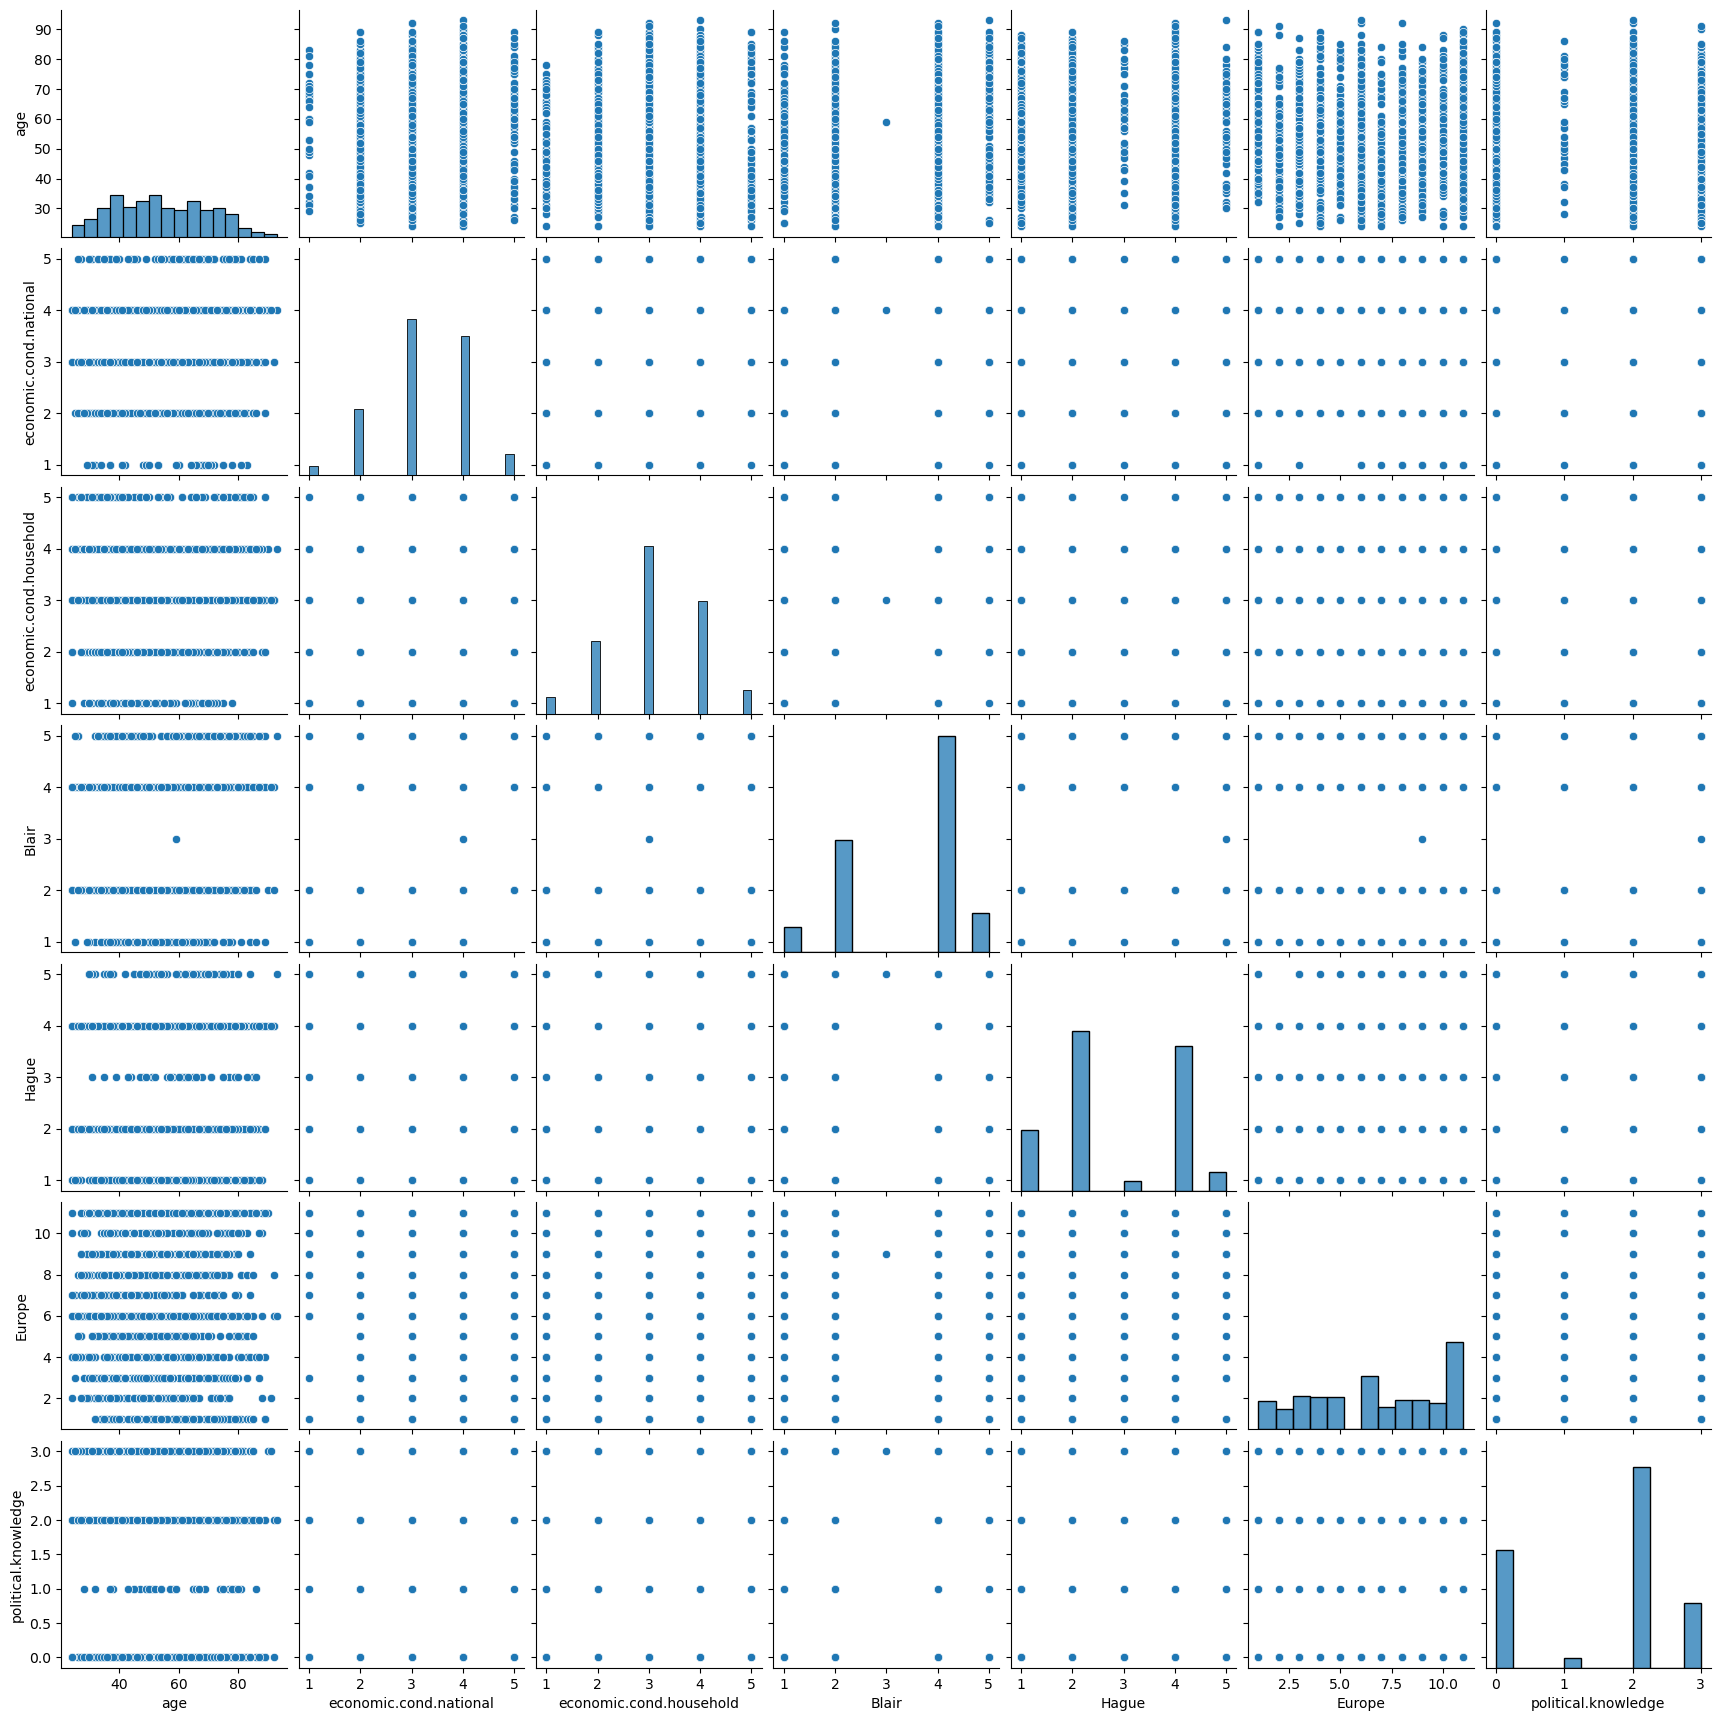

In [38]:
sns.pairplot(df)

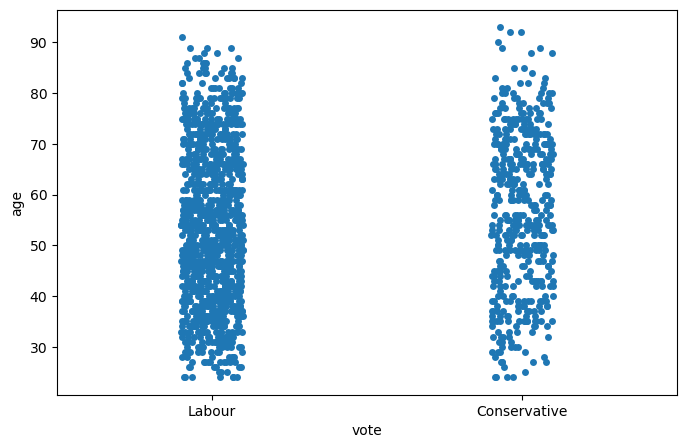

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(x="vote",y='age', data=df)
plt.show()

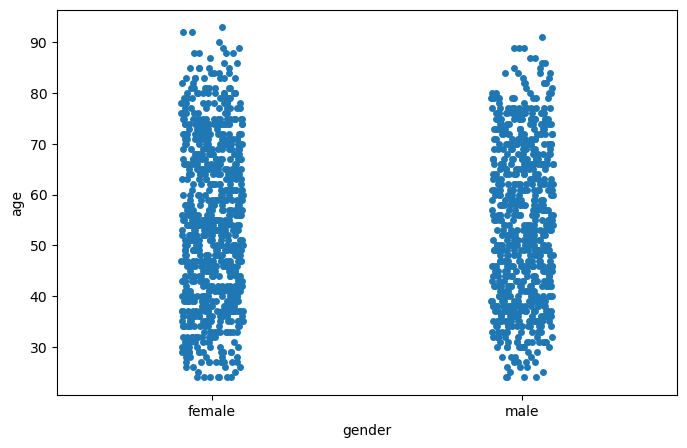

In [40]:
plt.figure(figsize=(8,5))
sns.stripplot(x="gender",y='age', data=df)
plt.show()

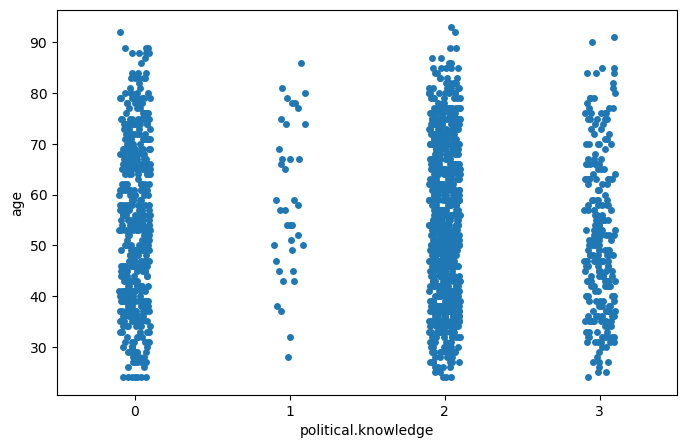

In [41]:
plt.figure(figsize=(8,5))
sns.stripplot(x="political.knowledge",y='age', data=df)
plt.show()

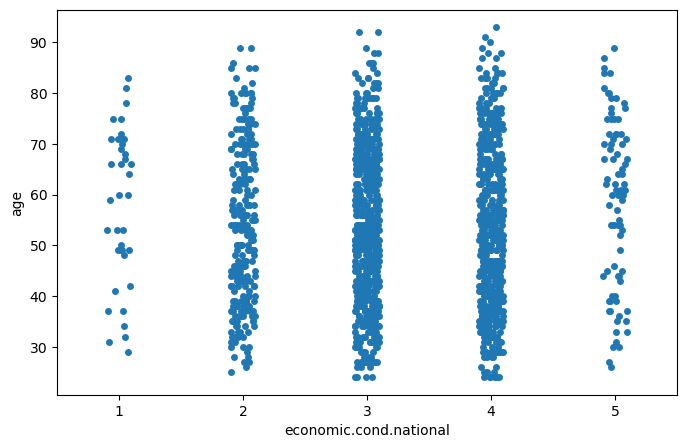

In [42]:
plt.figure(figsize=(8,5))
sns.stripplot(x="economic.cond.national",y='age', data=df)
plt.show()

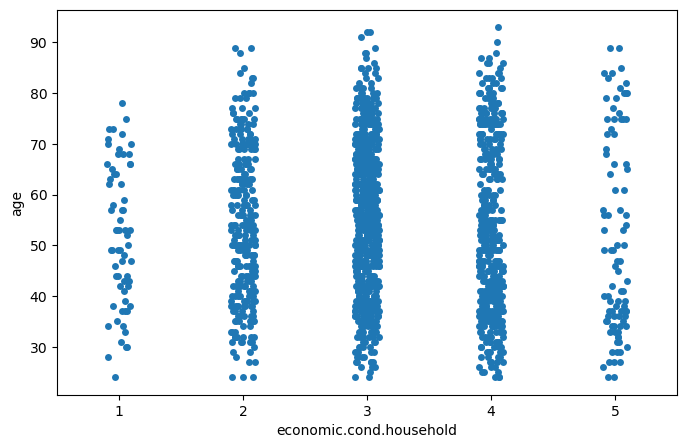

In [43]:
plt.figure(figsize=(8,5))
sns.stripplot(x="economic.cond.household",y='age', data=df)
plt.show()

<Axes: xlabel='age'>

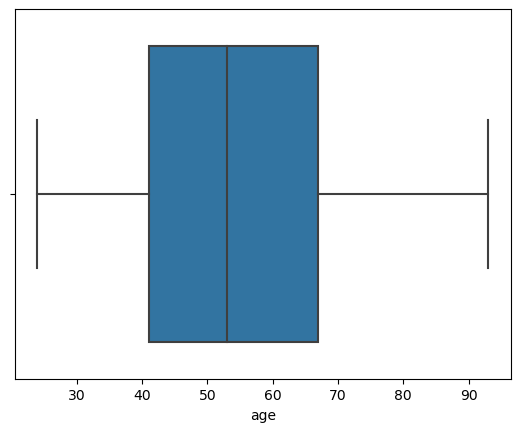

In [44]:
sns.boxplot(x='age',data=df)

<Axes: >

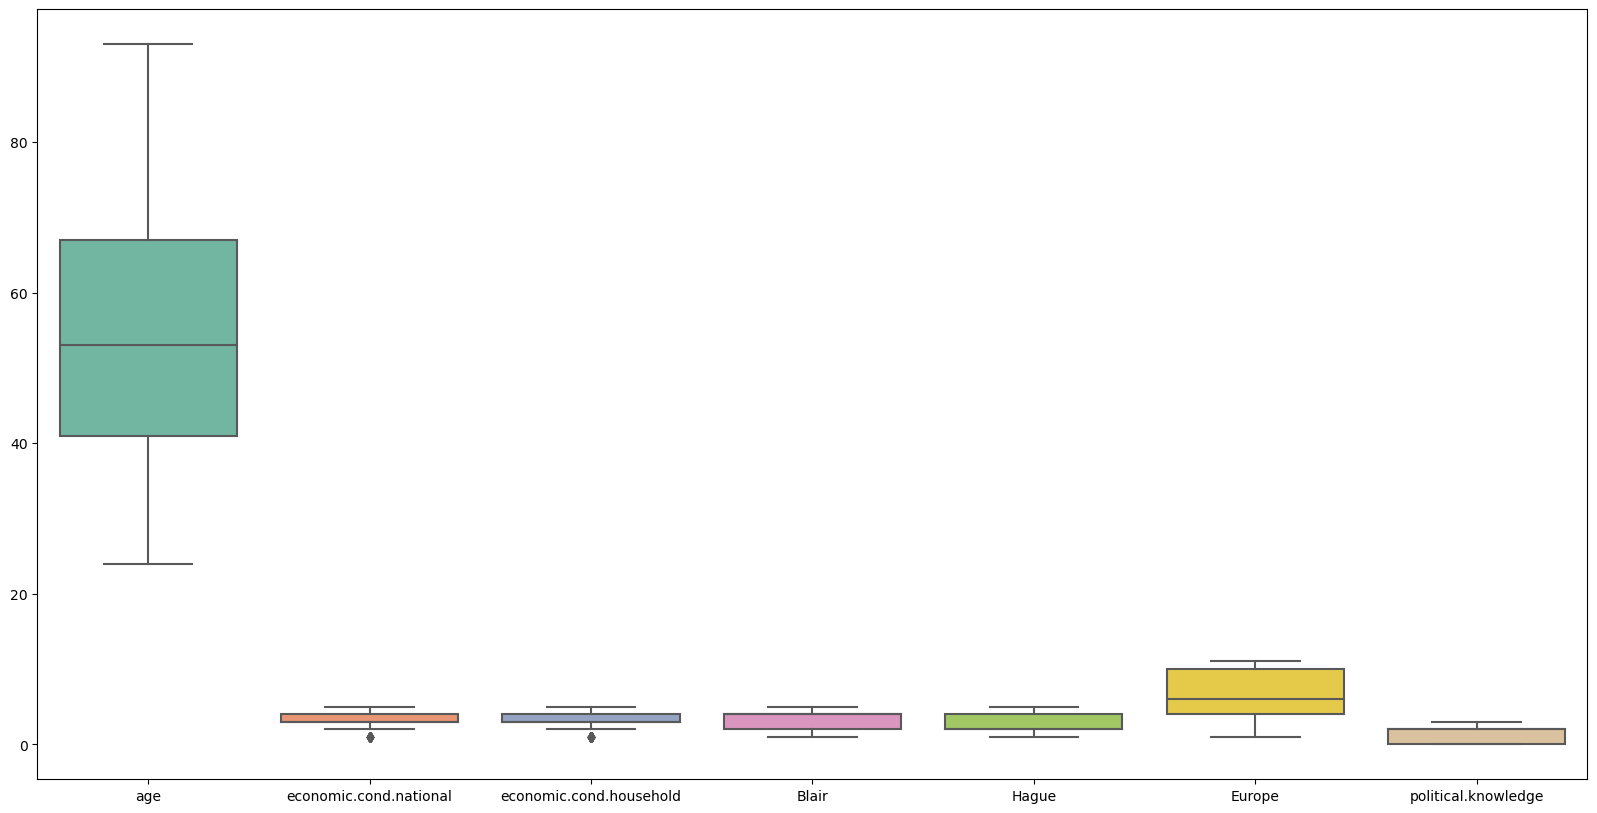

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="v", palette="Set2")

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

In [48]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

<Axes: >

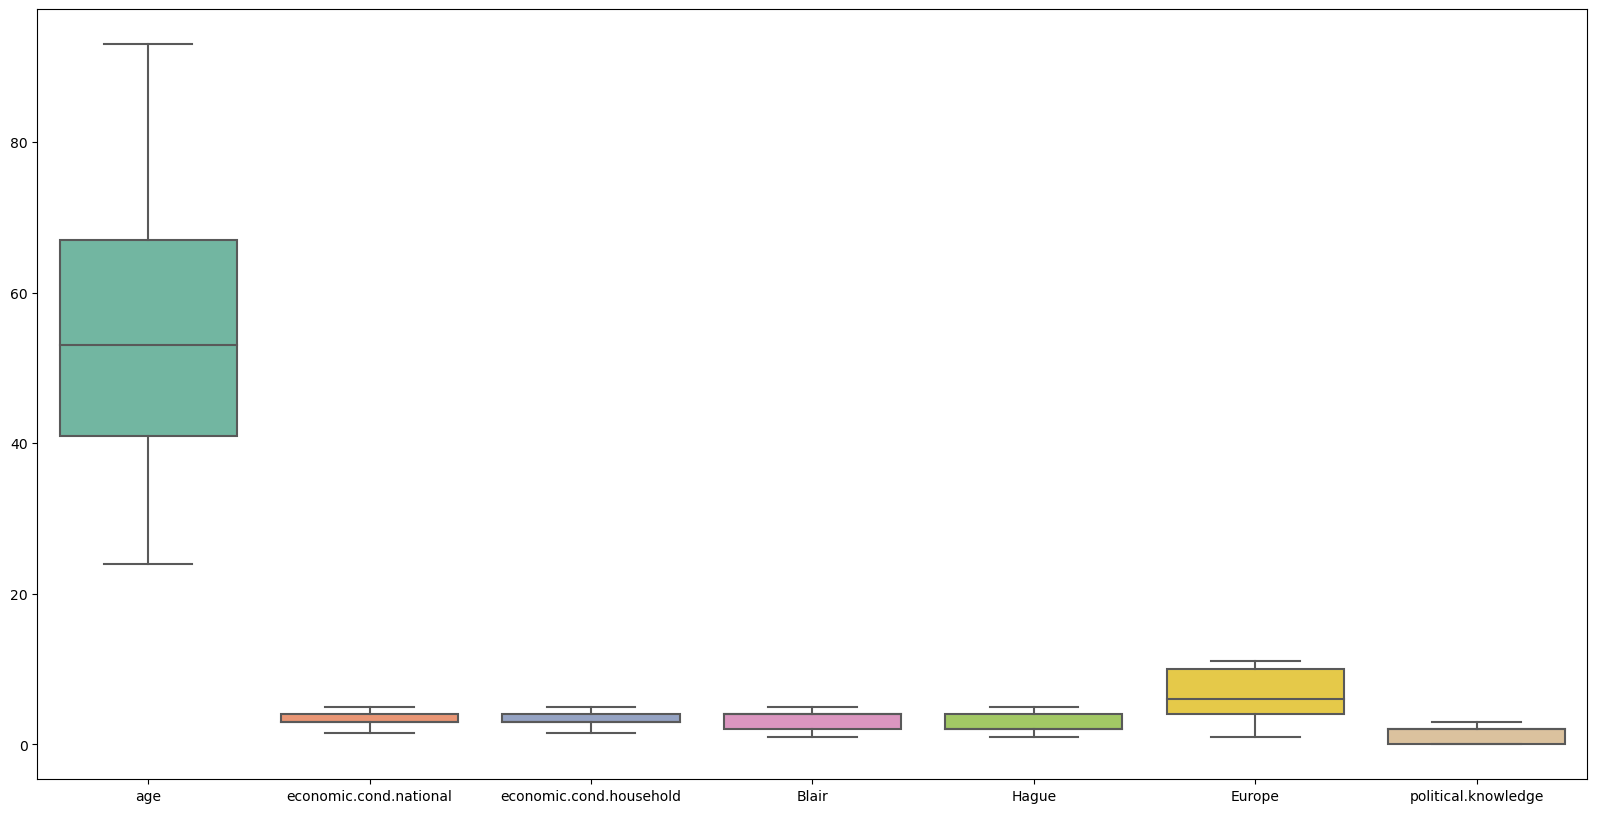

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="v", palette="Set2")

<Axes: >

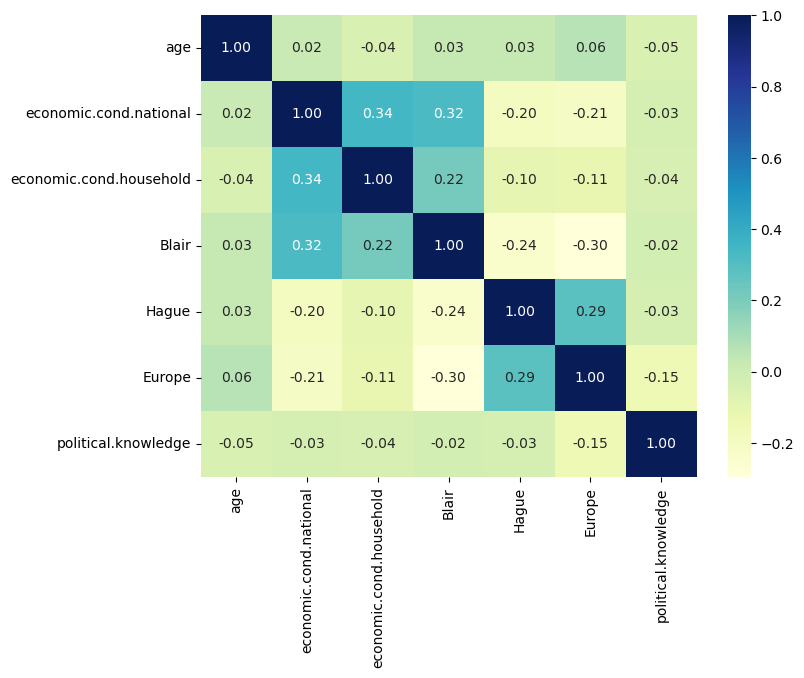

In [50]:
df_cor=df[num].corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt='.2f', cmap='YlGnBu')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 118.5+ KB


In [52]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print("\n")
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature]=pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [53]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


In [54]:
df["gender"].value_counts()

gender
0    808
1    709
Name: count, dtype: int64

In [55]:
df["vote"].value_counts()

vote
1    1057
0     460
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int8   
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 97.8 KB


In [57]:
X=df.drop('vote',axis=1)

In [58]:
y=df[['vote']]

# LOGISTIC_REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression  

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30 , random_state=1)

In [62]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_train)
model_score=model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_predict))
print(metrics.classification_report(y_train,y_predict))


0.8341187558906692
[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
cm = confusion_matrix(y_train, y_predict)
cm

array([[197, 110],
       [ 66, 688]], dtype=int64)

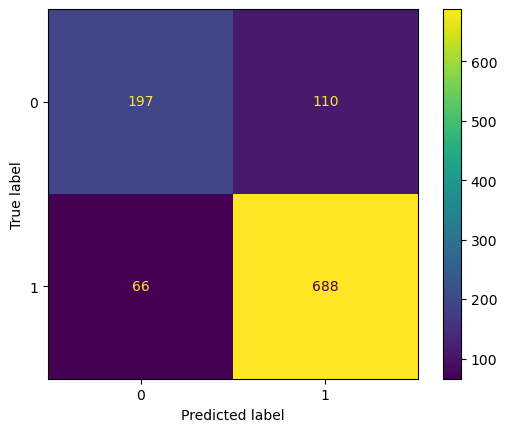

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.890


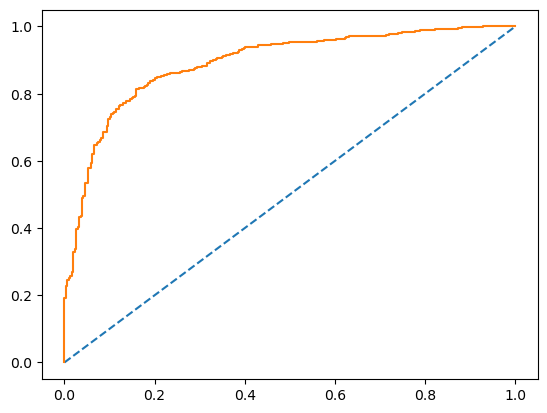

In [65]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [66]:
y_predict=model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.831140350877193
[[112  41]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [67]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[112,  41],
       [ 36, 267]], dtype=int64)

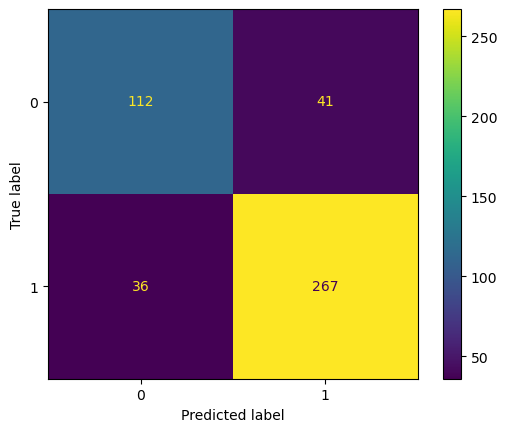

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.890


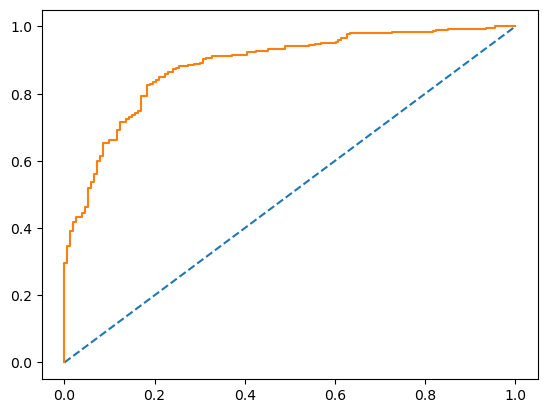

In [69]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# LDA

In [70]:
from sklearn import metrics,model_selection

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
LDA_model=LinearDiscriminantAnalysis()

In [73]:
LDA_model.fit(X_train,y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [74]:
y_train_predict=LDA_model.predict(X_train)
model_score=LDA_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [75]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[200, 107],
       [ 69, 685]], dtype=int64)

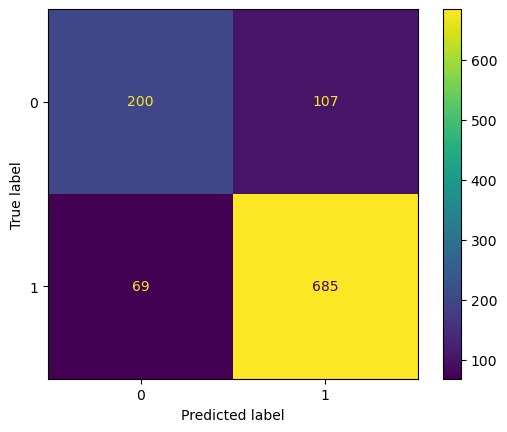

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.890


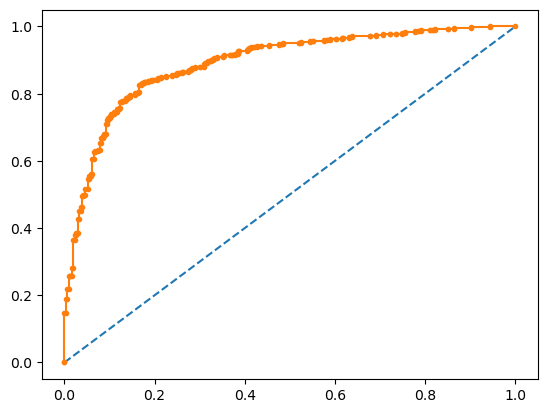

In [77]:
# AUC and ROC for the training data

# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

In [78]:
y_test_predict=LDA_model.predict(X_test)
model_score=LDA_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [79]:
cm = confusion_matrix(y_test,y_test_predict)
cm

array([[111,  42],
       [ 35, 268]], dtype=int64)

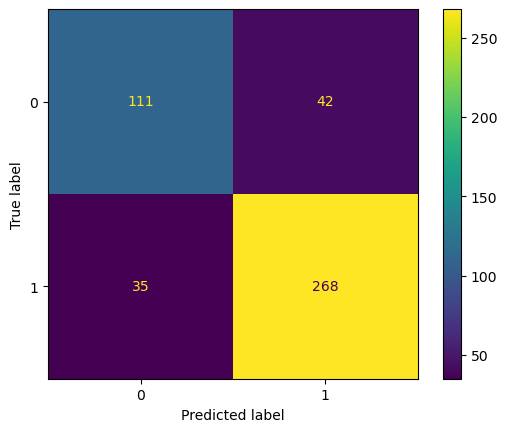

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.890


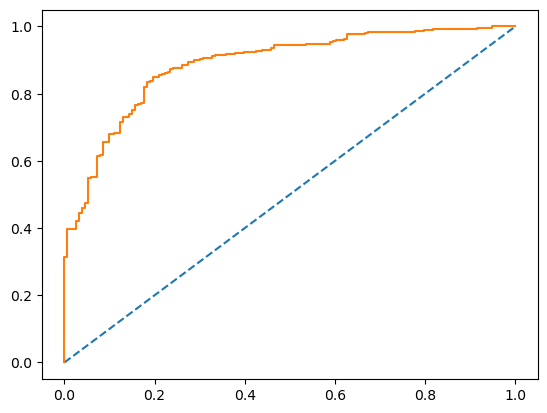

In [81]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# KNN

In [89]:
X1=X.copy()

In [90]:
X_scaled= X1.apply(zscore) 



In [91]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
KNN_model=KNeighborsClassifier()

In [96]:
KNN_model.fit(X_train,y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [97]:
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8567389255419415
[[217  90]
 [ 62 692]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [98]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[217,  90],
       [ 62, 692]], dtype=int64)

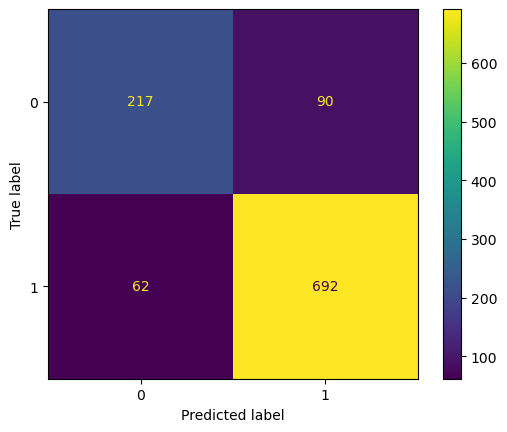

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.929


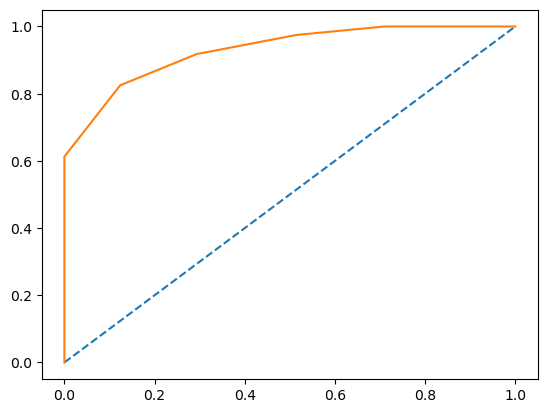

In [100]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [101]:
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8267543859649122
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [102]:
cm = confusion_matrix(y_test,y_test_predict)
cm

array([[109,  44],
       [ 35, 268]], dtype=int64)

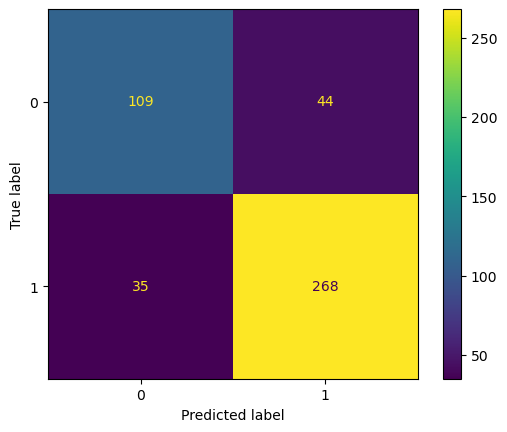

In [103]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.929


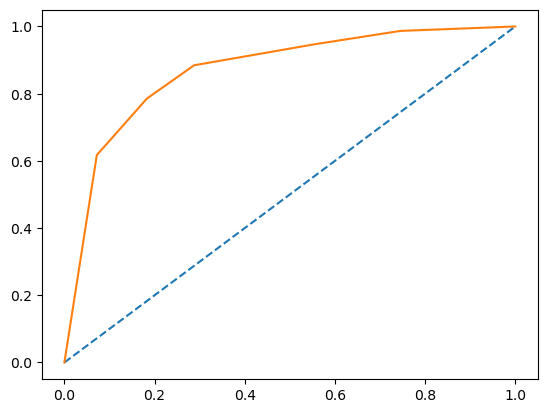

In [104]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# NAIVE BAYES

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
NB_model= GaussianNB()

In [107]:
NB_model.fit(X_train,y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [108]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [109]:
cm = confusion_matrix(y_train,y_train_predict)
cm

array([[212,  95],
       [ 81, 673]], dtype=int64)

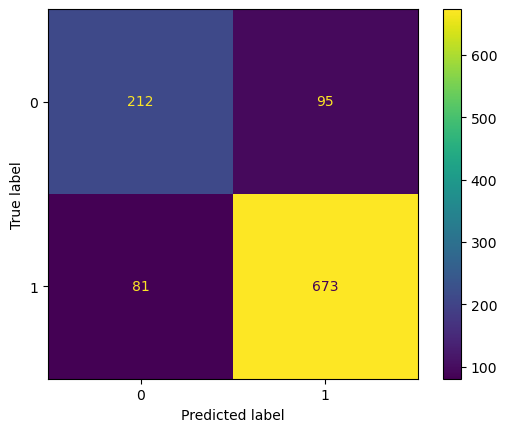

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.889


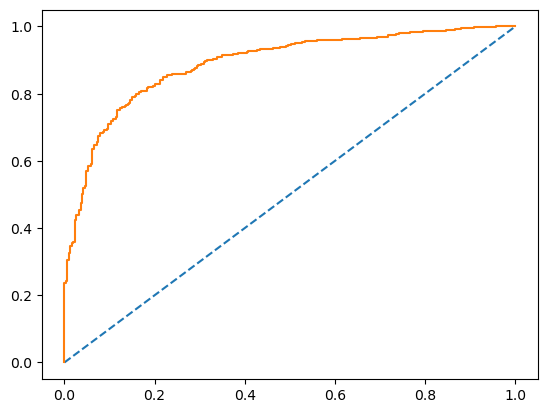

In [111]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [112]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [113]:
cm = confusion_matrix(y_test,y_test_predict)
cm

array([[112,  41],
       [ 40, 263]], dtype=int64)

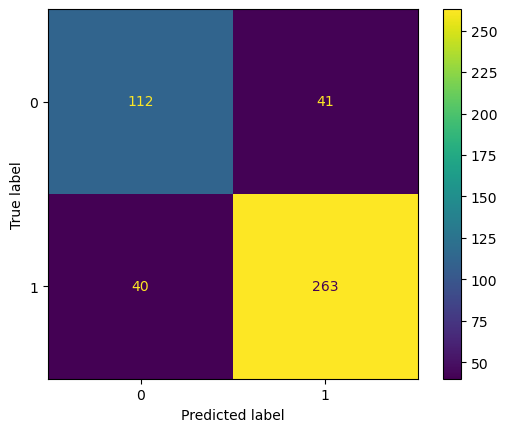

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.889


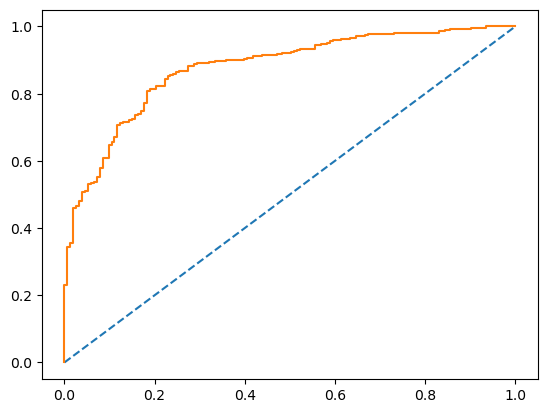

In [115]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# BAGGING

In [116]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [117]:
y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))


0.9679547596606974
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [118]:
cm = confusion_matrix(y_train,y_train_predict)
cm

array([[278,  29],
       [  5, 749]], dtype=int64)

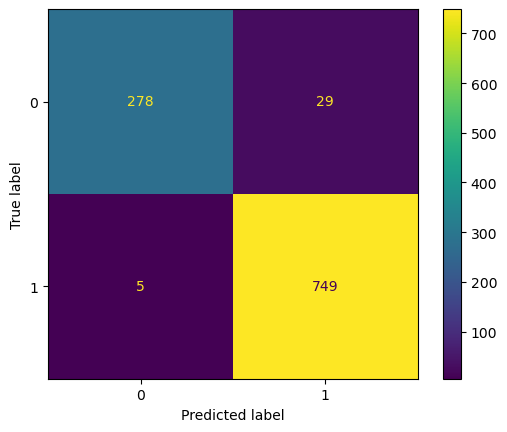

In [119]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.997


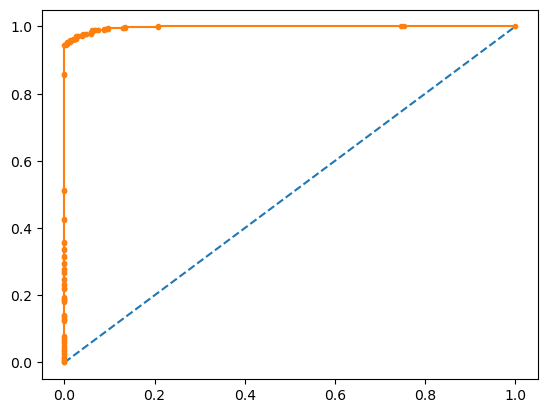

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [121]:
y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [122]:
cm = confusion_matrix(y_test,y_test_predict)
cm

array([[104,  49],
       [ 29, 274]], dtype=int64)

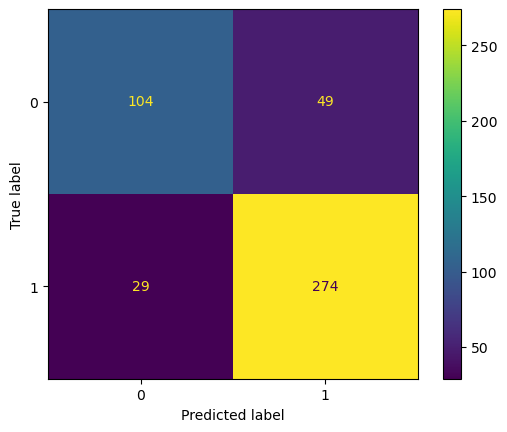

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.896


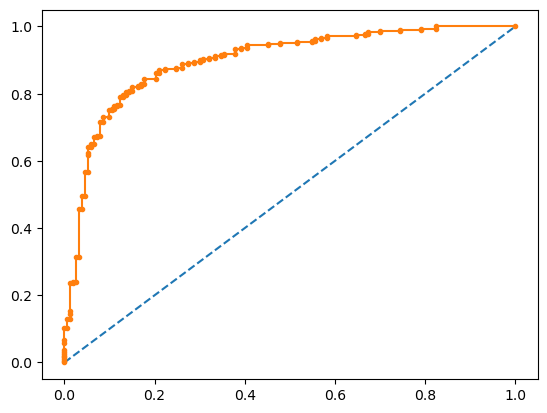

In [124]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# ADA boosting

In [125]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [126]:
y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



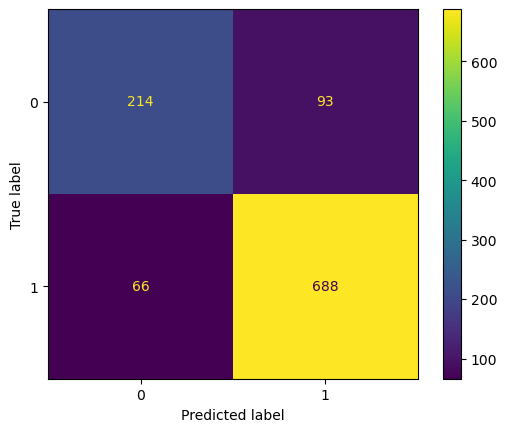

In [127]:
cm = confusion_matrix(y_train,y_train_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.915


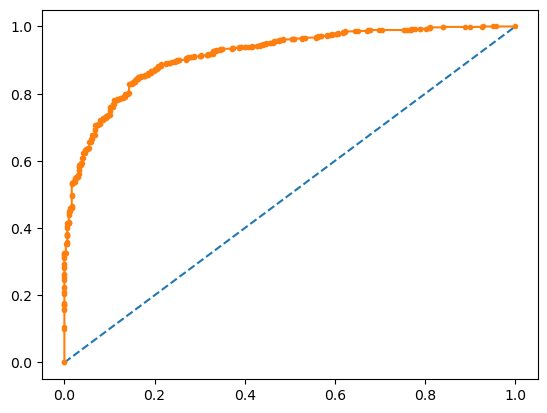

In [128]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [129]:
y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



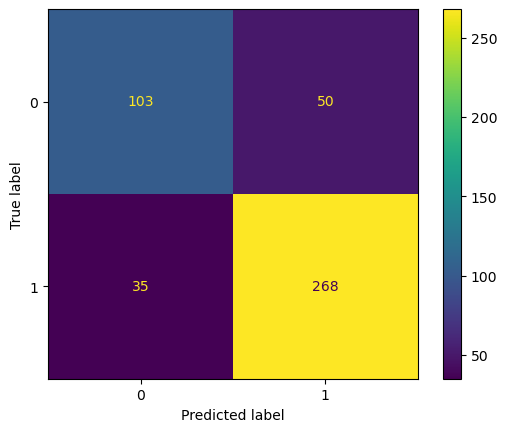

In [130]:
cm = confusion_matrix(y_test,y_test_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.877


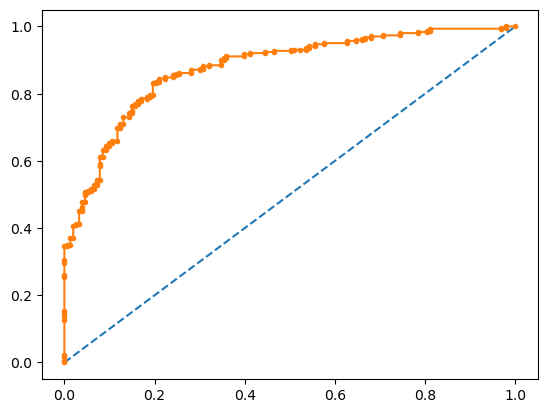

In [131]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# GRADIENT BOOSTING

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



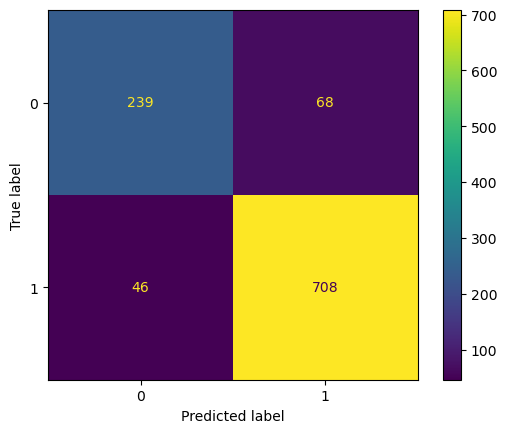

In [134]:
cm = confusion_matrix(y_train,y_train_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.951


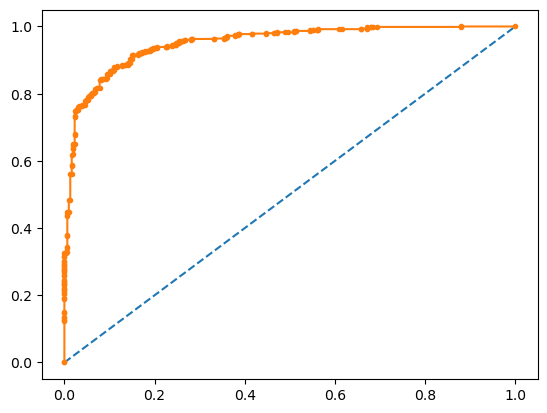

In [135]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [136]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



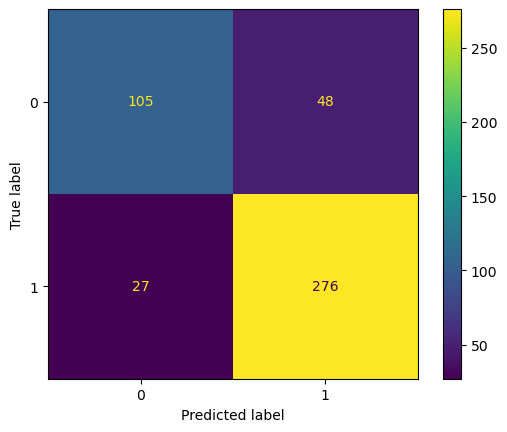

In [137]:
cm = confusion_matrix(y_test,y_test_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

AUC: 0.899


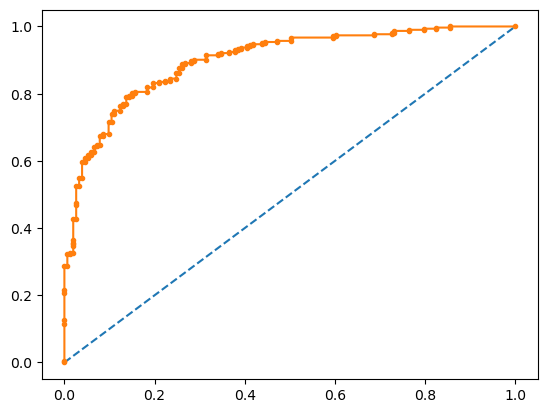

In [138]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# PROBELM 2

In [139]:
import re 
import nltk
import string
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\THANUSRI\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [140]:
number_of_character =len(Roosevelt)
print('number of character in Rossevelt file :',number_of_character)

number_of_character=len(Kennedy)
print('number of character in Kennedy file :',number_of_character)

number_of_character=len(Nixon)
print('number of character in Nixon file :',number_of_character)

number of character in Rossevelt file : 7571
number of character in Kennedy file : 7618
number of character in Nixon file : 9991


In [141]:
#Number of words in Rossevelt
x = (Roosevelt)
words= x.split()
print('Number of words in Roosevelt:',len(words))

Number of words in Roosevelt: 1360


In [142]:
#Number of words in Kennedy
x = (Kennedy)
words= x.split()
print('Number of words in Kennedy:',len(words))

Number of words in Kennedy: 1390


In [143]:
#Number of words in Nixon
x = (Nixon)
words= x.split()
print('Number of words in Nixon:',len(words))

Number of words in Nixon: 1819


In [144]:
#number of sentences in Roosevelt
y =pd.DataFrame({"Text":inaugural.raw('1941-Roosevelt.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,On each national day of inauguration since 178...,67


In [145]:
#number of sentences in kennedy
y =pd.DataFrame({"Text":inaugural.raw('1961-Kennedy.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [146]:
#number of sentences in Nixon
y =pd.DataFrame({"Text":inaugural.raw('1973-Nixon.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


In [147]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

Roosevelt_word_tokens = word_tokenize(Roosevelt)
Roosevelt_filtered_list = [word for word in Roosevelt_word_tokens if word.lower() not in stop_words]        
print(Roosevelt_word_tokens)
print(Roosevelt_filtered_list)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [148]:
Kennedy_word_tokens = word_tokenize(Kennedy)
Kennedy_filtered_list = [word for word in Kennedy_word_tokens if word.lower() not in stop_words]        
print(Kennedy_word_tokens)
print(Kennedy_filtered_list)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [149]:
Nixon_word_tokens = word_tokenize(Nixon)
Nixon_filtered_list = [word for word in Nixon_word_tokens if word.lower() not in stop_words]        
print(Nixon_word_tokens)
print(Nixon_filtered_list)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

In [150]:
# Stemming of words in Rossevelt
from nltk.stem import PorterStemmer
rossevelt_step = PorterStemmer()
print(rossevelt_step.stem(Roosevelt))

on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.

in washington's day the task of the people was to create and weld together a nation.

in lincoln's day the task of the people was to preserve that nation from disruption from within.

in this day the task of the people is to save that nation and its institutions from disruption from without.

to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.

lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.

there are men who doubt this. there are men who believe that democracy, as a form 

In [151]:
# Stemming of words in Kennedy
Kennedy_step = PorterStemmer()
print(Kennedy_step.stem(Kennedy))

vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.

we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [152]:
# Stemming of words in Nixon
Nixon_step = PorterStemmer()
print(Nixon_step.stem(Nixon))

mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:

when we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

as we meet here today, we stand on the threshold of a new era of peace in the world.

the central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.

this past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional friendship

In [153]:
from collections import Counter
from nltk. tokenize import RegexpTokenizer 
# top three most common words in Roosevelt
tokenizer = RegexpTokenizer (r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
roosevelt_word_count = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
roosevelt_common_words = roosevelt_word_count.most_common()
roosevelt_top_words = [x for x in roosevelt_common_words[0:3]]
print(roosevelt_top_words)

[('Nation', 12), ('Spirit', 9), ('Life', 9)]


In [154]:
# top three most common words in Kennedy
tokenizer = RegexpTokenizer (r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
kennedy_word_count = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
kennedy_common_words = kennedy_word_count.most_common()
kennedy_top_words = [x for x in kennedy_common_words[0:3]]
print(kennedy_top_words)

[('World', 8), ('Sides', 8), ('Pledge', 7)]


In [155]:
# top three most common words in Nixon
tokenizer = RegexpTokenizer (r'\w+')
Nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
Nixon_word_count = Counter(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
Nixon_common_words = Nixon_word_count.most_common()
Nixon_top_words = [x for x in Nixon_common_words[0:3]]
print(Nixon_top_words) 

[('America', 21), ('Peace', 19), ('World', 18)]


In [156]:
from wordcloud import WordCloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    
    # Display the generated word cloud
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.xlabel('Word Cloud')
    plt.tight_layout(pad = 0) 
  
    plt.show() 

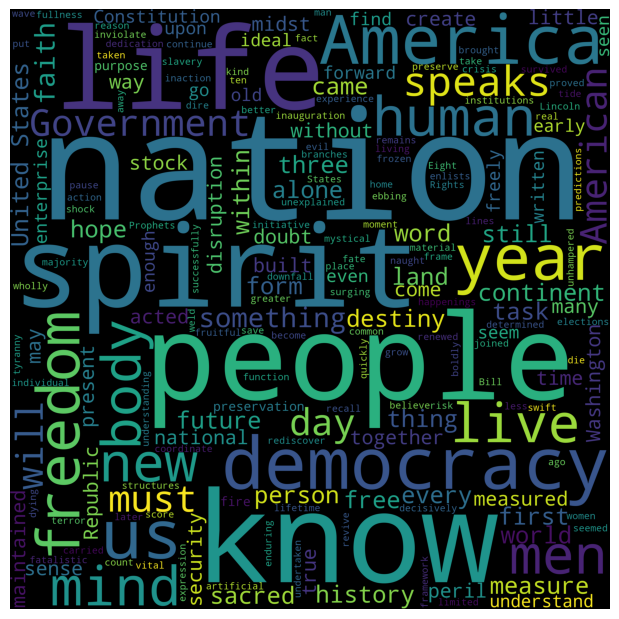

In [157]:
# Wordcloud for Roosevelt
generate_wordcloud(Roosevelt)

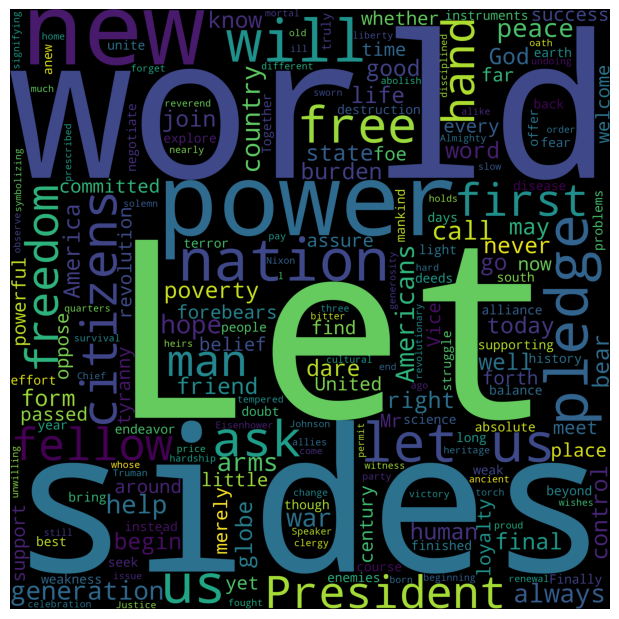

In [158]:
# Wordcloud for Kennedy
generate_wordcloud(Kennedy)

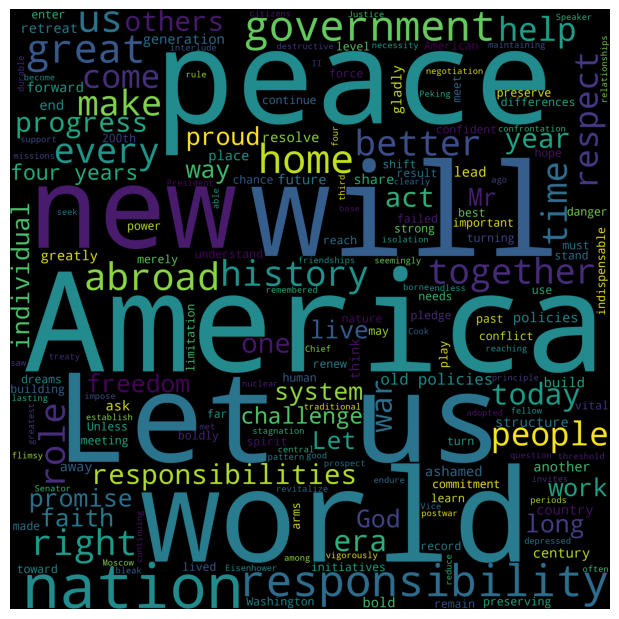

In [159]:
# Wordcloud for Nixon
generate_wordcloud(Nixon)